<a href="https://colab.research.google.com/github/NamalSanjaya/CV_A04/blob/main/Assignment04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data() ## Loading the data set

In [ ]:
x_train_copy , x_test_copy = x_train.copy() , x_test.copy()

In [ ]:
K = len(np.unique(y_train)) # Classes
Ntr = x_train.shape[0]

Nte = x_test.shape[0]
Din = 3072 # CIFAR10
# Din = 784 # MINIST

# Normalize pixel values

x_train, x_test = x_train / 255.0, x_test / 255.0
mean_image = np.mean(x_train, axis=0)
x_train = x_train - mean_image
x_test = x_test - mean_image

y_train = tf.keras.utils.to_categorical(y_train, num_classes=K)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=K)
x_train = np.reshape(x_train,(Ntr,Din))
x_test = np.reshape(x_test,(Nte,Din))
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')



In [ ]:
x_train.shape

(50000, 3072)

In [ ]:
def Square_Error(predict,true):
  return (1/Ntr) * np.sum( (true - predict)**2)

def sigmoid(arr):
  return 1/(1+np.exp(-arr))

def Accuracy(predict,true):
  ct = 0

  for i in range(5000):
    for j in range(10):
      a,b = predict[i,j] , true[i,j]

      if a*b >= 0:
        ct +=1
  return ct/50000


In [ ]:
def forward(x,y,w,b,N):
  predict = sigmoid( np.dot(x , w) + b )
  loss = Square_Error(predict,y)
  acc  = Accuracy(predict,y)
  return loss,predict,acc
  

In [ ]:
def W_derivatef(x,y,yht,N):
  return (2/N)*np.sum( np.dot( x.T , (yht - y) ) )

def B_derivatef(y,yht,N):
  return (2/N)*np.sum(yht - y)

In [ ]:
def Gradient_Descent(X,Y,epochs):
  std=1e-5
  weight = std*np.random.randn(Din, K)
  baise = np.zeros(K)
  rate = 0.1

  for loops in range(epochs):
    Loss , y_hat , accuracy = forward(X,Y,weight,baise,Ntr)
    diff_W       =  W_derivatef(X,Y,y_hat,Ntr)
    diff_b       = B_derivatef(Y,y_hat,Ntr)

    weight = weight - rate * diff_W
    baise  = baise  - rate * diff_b

    print(loops+1, ") Loss : " , Loss , "  Accuracy : ",accuracy)

  return weight,baise


In [ ]:
x_train_copy.shape

(50000, 3072)

In [ ]:
y_train.shape

(50000, 10)

In [ ]:
W , b = Gradient_Descent(x_train,y_train,10)

1 ) Loss :  2.5000043113963977   Accuracy :  1.0
2 ) Loss :  3.2049151865372916   Accuracy :  1.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in exp
  """


3 ) Loss :  4.807500587038186   Accuracy :  1.0
4 ) Loss :  5.191836511777629   Accuracy :  1.0
5 ) Loss :  4.807434298150962   Accuracy :  1.0
6 ) Loss :  5.191618569526725   Accuracy :  1.0
7 ) Loss :  4.807322880558966   Accuracy :  1.0
8 ) Loss :  5.191466570163788   Accuracy :  1.0
9 ) Loss :  4.807228654621479   Accuracy :  1.0
10 ) Loss :  5.191333599909102   Accuracy :  1.0


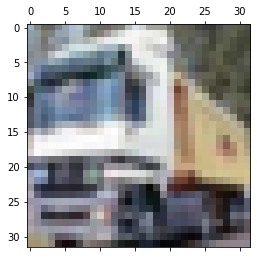

In [ ]:
plt.matshow(x_train_copy[1])

In [ ]:
x_train_copy[1][1,1]

array([145, 153, 154], dtype=uint8)

In [ ]:
new = W.T

In [ ]:
truck[1,1]

array([254, 254, 254], dtype=uint8)

In [ ]:
truck     = new[9].reshape(32,32,3)
truck  = truck*255 / np.max(truck)
truck = truck.astype("uint8")


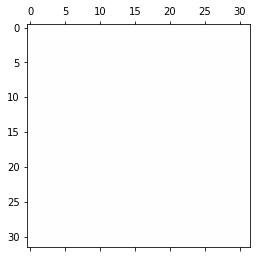

In [ ]:
plt.matshow(truck)

In [ ]:
a = np.array([1,2,3])
b = np.array([-2,0,5])

In [ ]:
a**2

array([1, 4, 9])